### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from scipy import stats

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import auc,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

### Introduction

<b>Abstract: </b>Based on every observation's attributes, predict whether a person, income exceeds 50k annually, also known as "Census Income" dataset. It's Classification Task, with categorical and numerical features, some of the instance have missing values, the missing value was denoted as "?".

### Objective

<b>Problem statement:</b>
We have been provided with an Excel dataset that has 15 columns and 48842 rows.The task is to analyze the dataset and predict whether the income of an adult will exceed 50k per year or not by developing a supervised machine learning model.

### Import the data

In [2]:
adult_df = pd.read_csv("adult.csv")

### Data wrangling
1. Check First  5 Rows

In [3]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Check last 5 rows

In [4]:
adult_df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# Check shape of the dataset
adult_df.shape

(48842, 15)

In [6]:
# Check Detailed information of dataset
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
adult_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Check Null Values
adult_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Insights From Data:

    1. This Data has 15 Variables and 48842 Observations.
    
    2. They are no null values present in the data.
    
    3. The list of variables are:
    
 * <b> Age: </b> This attribute tells us about the age of an individual. It is a numerical attribute with continuous values.<br><br>
    
 * <b> WorkClass: </b> This attribute tells us about the individual work class of an individual. It is a categorical attribute, with different values like private, federal-gov, local-gov, state-gov, etc. It is a Nominal attribute.<br><br>
    
 * <b> FnlWgt: </b> It is a numerical attribute with continuous values. <br><br>
    
 * <b> Education: </b> This attribute tells us about the highest education level of an individual. It is a categorical attribute, with different values like Bachelors, Preschool, Masters, Doctorate, etc. It is a Nominal attribute.<br><br>
    
 * <b> Education-num: </b> This attribute is a numerical representation of the education attribute, indicating the highest education level of any individual. It is an Ordinal attribute.<br><br>
    
 * <b> Marital-Status: </b> This attribute tells us about the marital status of an individual. It is a categorical attribute, with different values like Married-civ-spouse, Divorced, Never-married, etc. It is a Nominal attribute.<br><br>
    
 * <b> Occupation: </b>This attribute tells us about the field of occupation of an individual. It is a categorical attribute, with different values like Tech-Support, Craft-repair, Sales, etc. It is a Nominal attribute.<br><br>
   
 * <b>Relationship: </b>This attribute tells us about individual's relation in a family. It is a categorical attribute, with different values like Wife, Husband, Unmarried, etc. It is a Nominal attribute.<br><br>
    
 * <b>Race: </b>This attribute tells us about the race of an individual. It is a categorical attribute, with different values like White, Black, Asian-Pac-Islander, etc. It is a Nominal attribute.<br><br>
    
 * <b>Sex:</b> This attribute tells us about the sex/gender of an individual. It is a categorical attribute, with two values Male, Female. It is a Nominal attribute.<br><br>
    
 * <b>Capital-Gain: </b> This attribute tells us the gain/income from investment sources other than salary. It is a numerical attribute with continuous values.<br><br>
    
 * <b> Capital-Loss: </b> This attribute tells us the loss from investment sources other than salary. It is a numerical attribute with continuous values.<br><br>
    
 * <b>Hours-Per-Week: </b> This attribute tells us number of hours an individual works per week. It is a numerical attribute with continuous values.<br><br>
    
 * <b>Native-Country: </b> This attribute tells us about the native country/country of origin of an individual. It is a categorical attribute with values like United-States, India, England, etc. It is a Nominal attribute.<br><br>
    
 * <b>Income: </b> This attribute tells us about the income of an individual, whether it is less than 50k or greater than 50k. It is a categorical value, and a nominal attribute.

In [9]:
# check the columns
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
#Check for special characters in the dataset
adult_df.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

* we see that there is a special character as " ?" for columns workcalss, occupation, and native country
* so we need to clean those data 

In [11]:
# replacing the special character to nan and then drop the columns
adult_df['workclass'] = adult_df['workclass'].replace('?',np.nan)
adult_df['occupation'] = adult_df['occupation'].replace('?',np.nan)
adult_df['native-country'] = adult_df['native-country'].replace('?',np.nan)

In [12]:
# replaced the nan values with mode values
adult_df['workclass'].fillna(adult_df['workclass'].mode()[0],inplace=True)

In [13]:
adult_df['occupation'].fillna(adult_df['occupation'].mode()[0],inplace=True)

In [14]:
adult_df['native-country'].fillna(adult_df['native-country'].mode()[0],inplace=True)

In [15]:
#Finding if any special characters are still present in the dataset
adult_df.isin(['?']).sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [16]:
# for loop for value_counts of each column to find out unique values. 
for c in adult_df.columns:
    print("----%s----"%c)
    print(adult_df[c].value_counts())

----age----
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
----workclass----
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
----fnlwgt----
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
82649      1
193304     1
227689     1
135891     1
250034     1
Name: fnlwgt, Length: 28523, dtype: int64
----education----
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name:

<h2 style="color:green" align="center">Univariate Analysis</h2>

In [17]:
adult_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Check distribution for Age

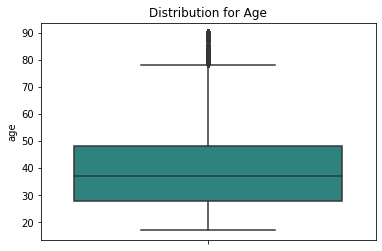

In [18]:
sns.boxplot(y ="age", data= adult_df,palette='viridis')
plt.title("Distribution for Age")
plt.show()

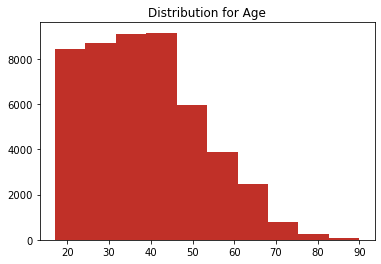

In [19]:
plt.hist(x='age', data=adult_df,color='#C03028')
plt.title("Distribution for Age")
plt.show()

#### Observations
* The minimum age of the individuals are 17.
* Most of the individuals have age less than 50.
* Maximum age of the individuals are 90.
* They are outliers present after age 80.
* We can see that distribution for age is showing right skewed distribution.

### Check distribution for finalweight

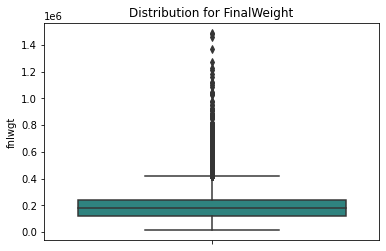

In [20]:
sns.boxplot(y="fnlwgt", data=adult_df, palette='viridis')
plt.title("Distribution for FinalWeight")
plt.show()

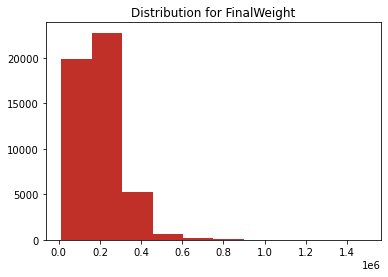

In [21]:
plt.hist(x="fnlwgt", data=adult_df, color='#C03028')
plt.title("Distribution for FinalWeight")
plt.show()

#### Observations
* They are lot of outliers present in the data.
* We can see that distribution for finalweight is showing right skewed distribution.

### Check distribution for Capital Gain

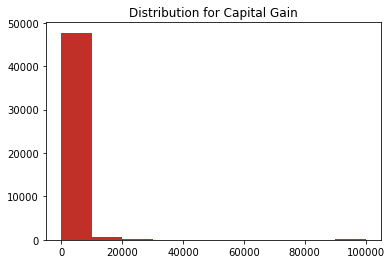

In [22]:
plt.hist(x="capital-gain", data=adult_df, color='#C03028')
plt.title("Distribution for Capital Gain")
plt.show()

### Observations:
* Capital gain shows that either a person has no gain or has gain of very large amount(10k or 99k).
* The distribution is highly right skewed.

### Check distribution for Capital Loss

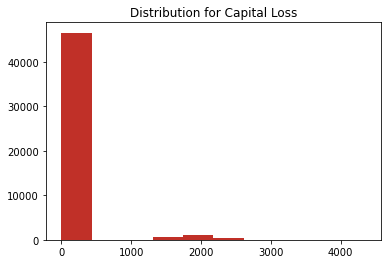

In [23]:
plt.hist(x="capital-loss", data=adult_df, color='#C03028')
plt.title("Distribution for Capital Loss")
plt.show()

### Observations:
* Most of the capital-loss values are centered on 0 value and only few are non zero(2282). 
* This attribute is similar to the capital-gain as most of the values are centered on 0(nearly 43000).
* The distribution is highly right skewed.

### Check distribution for Hours-per-week

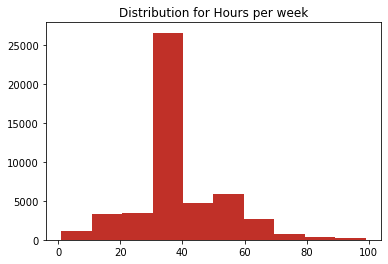

In [24]:
plt.hist(x="hours-per-week", data=adult_df, color='#C03028')
plt.title("Distribution for Hours per week")
plt.show()

### Observations:
* Here we get the information about the number of working hours spend by an individual in a week.
* The hours per week attribute varies within the range of 1 to 99.
* We can observe that,30-40 hrs around 27000 people work per week. There are also few people who works 80-100 hours per week and some less than 20 which is unusual.
* The data is approximately symmetric.

### Check distribution for workclass

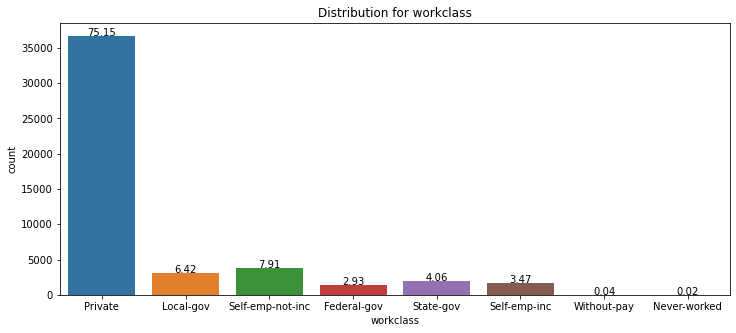

In [25]:
plt.figure(figsize=(12,5))
total = float(len(adult_df['income']))
a = sns.countplot(x='workclass',data=adult_df)
for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
plt.title("Distribution for workclass")
plt.show()

### Observations:
* Most of them belong to private workclass which is around 75%. 
* Remaining are evenly distributed among state-gov, federal-gov, local-gov, self-emp-inc and self-emp-not-inc.
* Minimum count has without-pay and never-worked workclass.

### Check distribution for Education

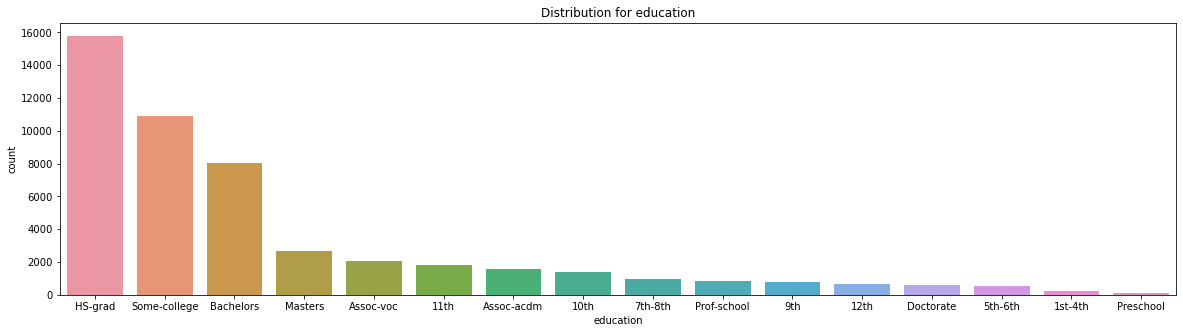

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(x='education',data=adult_df,order=adult_df['education'].value_counts().index)
plt.title("Distribution for education")
plt.show()

### Observations:
* Majority of people have completed high graduation, have attended college or have atleast completed masters.

### Check distribution for Marital status

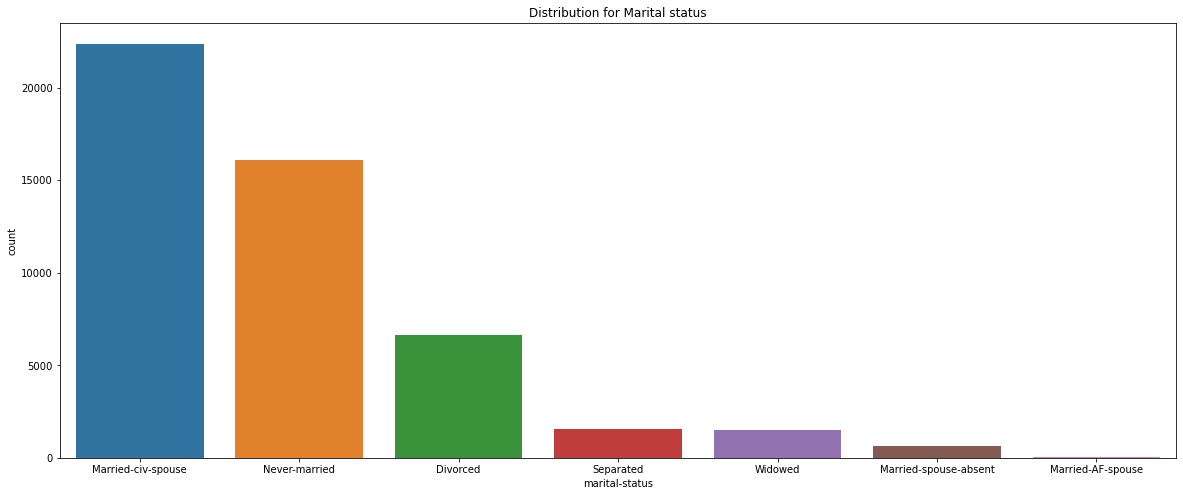

In [27]:
plt.figure(figsize=(20,8))
sns.countplot(x='marital-status',data=adult_df,order=adult_df['marital-status'].value_counts().index)
plt.title("Distribution for Marital status")
plt.show()

### Observations:
* Considering the marital status, 50% are married and 35% are never married.

### Check distribution for occupation

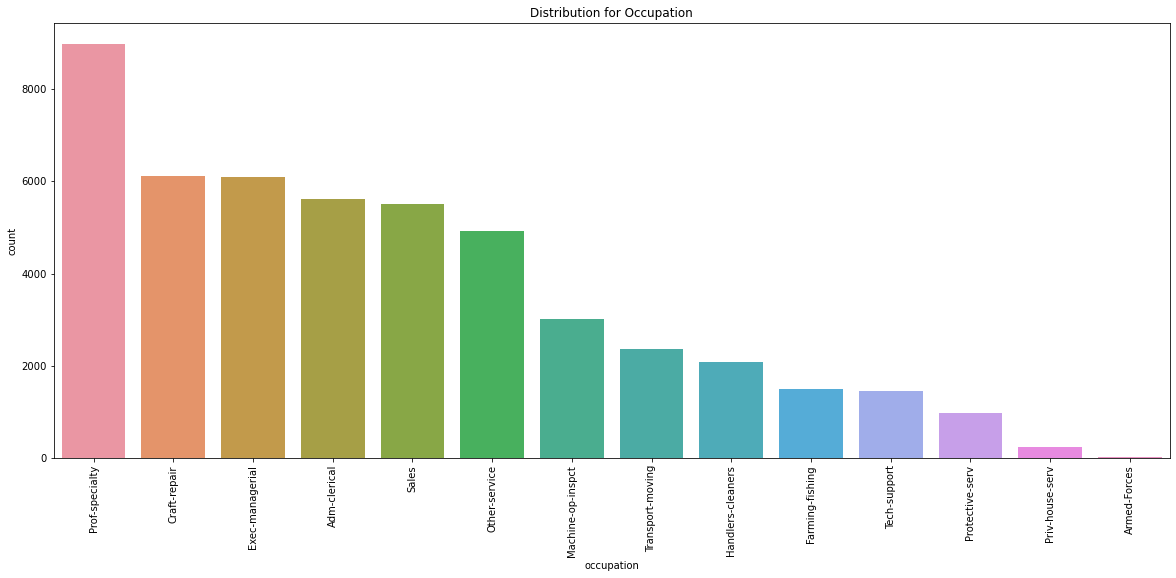

In [28]:
plt.figure(figsize=(20,8))
sns.countplot(x='occupation',data=adult_df,order=adult_df['occupation'].value_counts().index)
plt.title("Distribution for Occupation")
plt.xticks(rotation=90)
plt.show()

### Observations:
* Prof-specialty has the maximum count. 
* Armed-Forces has minimum samples in the occupation attribute.
* The occupation variable is equally distributed among various occupations.

### Check distribution for relationship

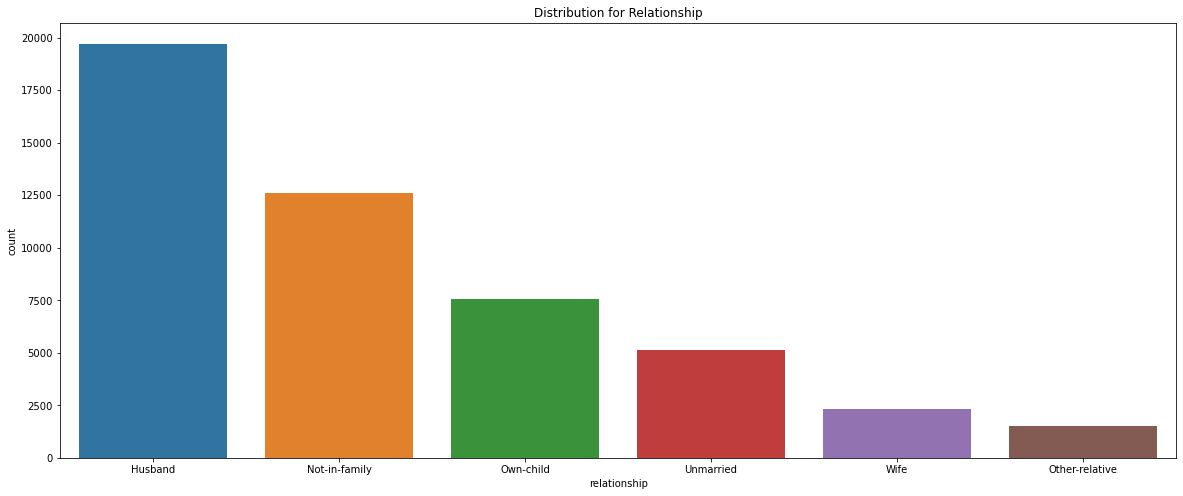

In [29]:
plt.figure(figsize=(20,8))
sns.countplot(x='relationship',data=adult_df,order=adult_df['relationship'].value_counts().index)
plt.title("Distribution for Relationship")
plt.show()

### Observations:
* Most of the people in the survey are husbands, while a few are people who are not in family.

### Check distribution for race

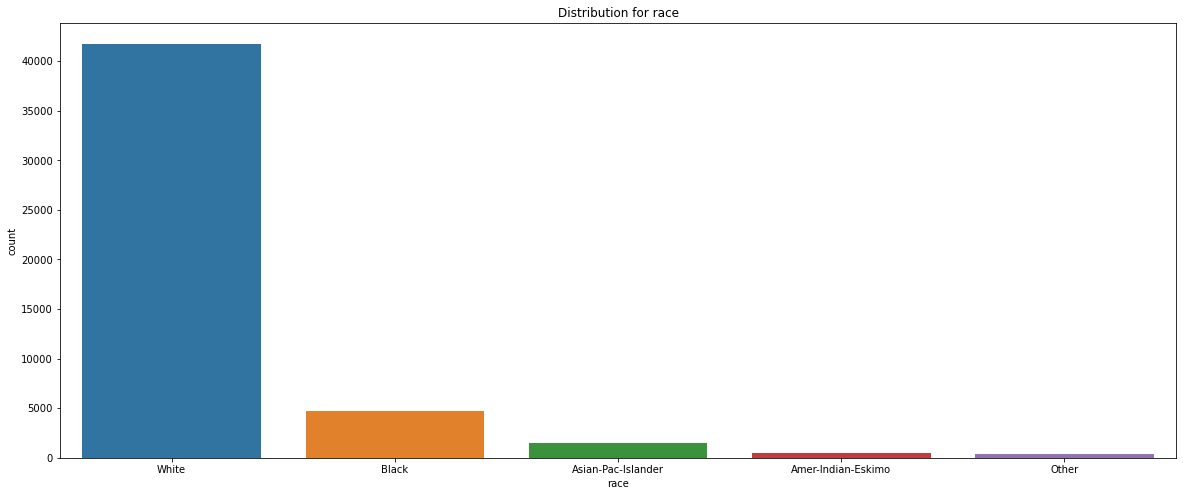

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(x='race',data=adult_df,order=adult_df['race'].value_counts().index)
plt.title("Distribution for race")
plt.show()

### Observations:
* Maximum are white people in the data, while there are considerable amount of black people. 
* Very few belong to othere races.

### Check distribution for gender

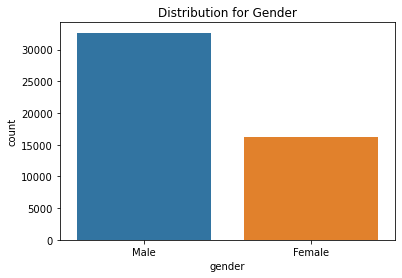

In [31]:
sns.countplot(x='gender',data=adult_df)
plt.title("Distribution for Gender")
plt.show()

### Observations:
* Majority of the population according to the census data are male.

### Check the distribution for native-country

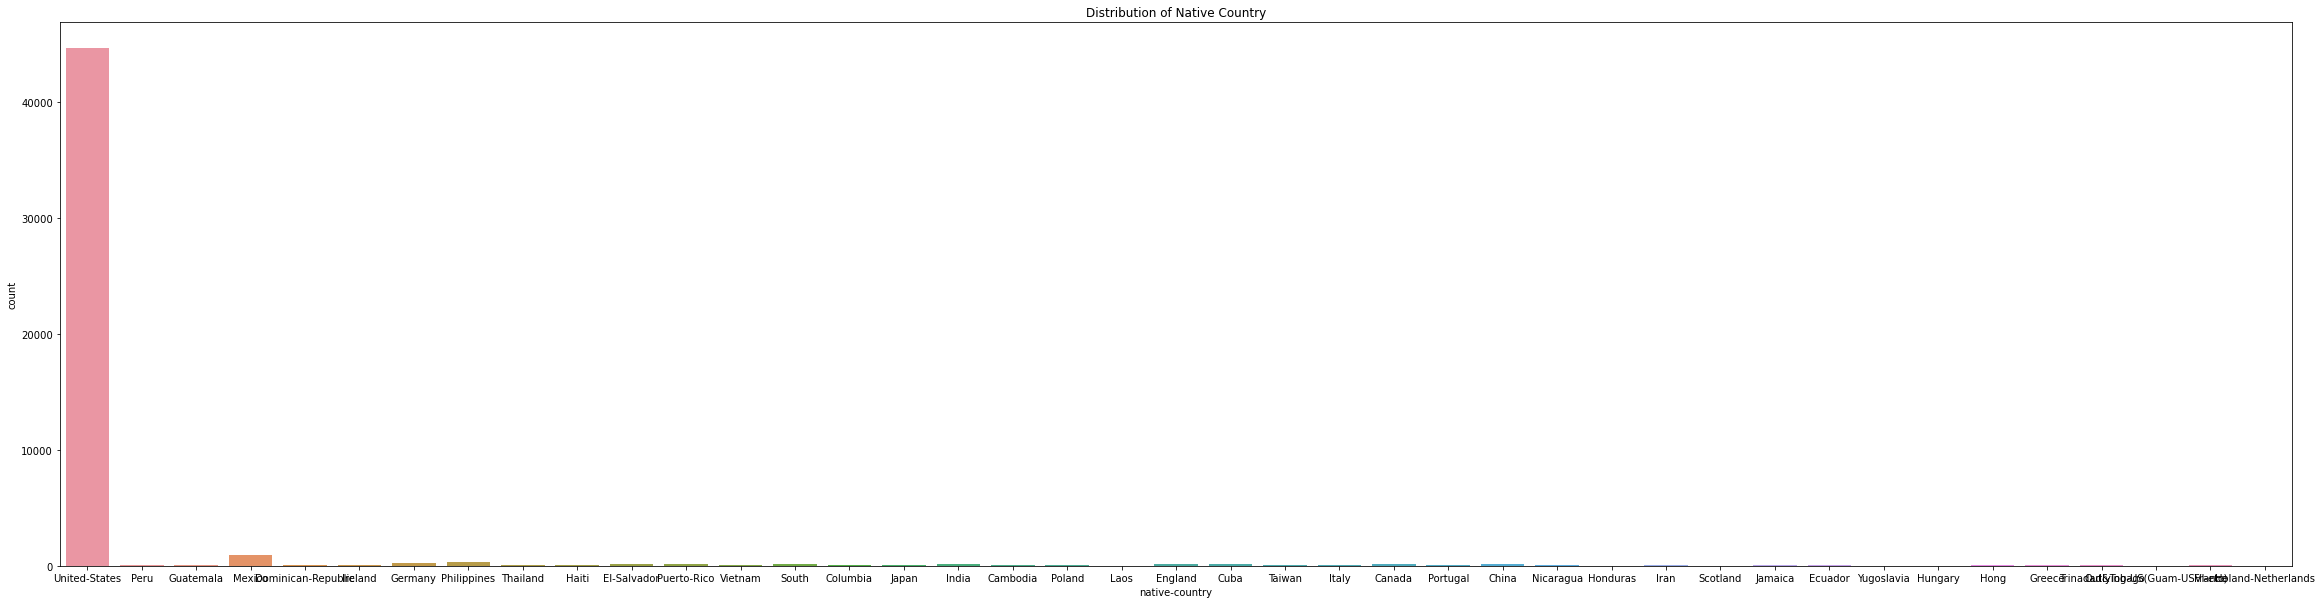

In [32]:
plt.figure(figsize=(40,10))
sns.countplot(x='native-country',data=adult_df)
plt.title("Distribution of Native Country")
plt.show()

### Observations:
* Majority of the people are from United States, however there are a few from Mexico, and very few from India, Jamaica, Cuba, Germany, etc.

### Check the distribution for income

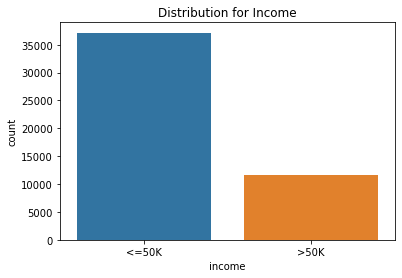

In [33]:
sns.countplot(x='income',data=adult_df)
plt.title("Distribution for Income")
plt.show()

### Observations:
* Majority of the people have an income of less than 50k according to the data given, indicating that the data is somewhat skewed.

<h2 style="color:green" align="center">Bivariate Analysis</h2>

### Plotting a boxplot for Income Vs Age

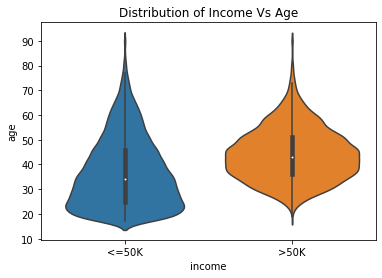

In [34]:
sns.violinplot(x='income',y='age', data=adult_df)
plt.title("Distribution of Income Vs Age")
plt.show()

### Observations:
* Income group of less than 50k has low medain "age" of 34 year than the income group of greater than 50k which has median "age"(42 year).

### Plotting a boxplot for Income Vs Workclass

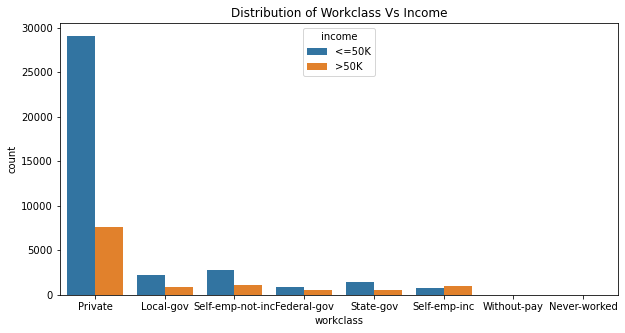

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue='income',data=adult_df).set_title("Distribution of Workclass Vs Income")
plt.show()

* For private employees,the number of people earning <=50k is more than the number of people earning >50k.
* In remaining workclass, also number of people earning <=50k are more than those earning > 50k.

### Plotting a boxplot for Income Vs Capital gain

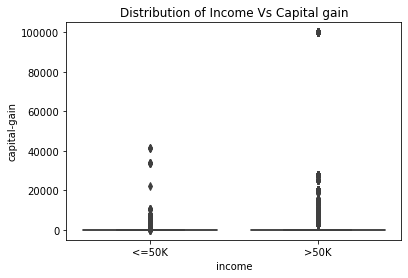

In [36]:
sns.boxplot(x="income",y="capital-gain",data=adult_df).set_title("Distribution of Income Vs Capital gain")
plt.show()

* Most of the capital gain value is accumulated at 0 for both the income group.

### Plotting a boxplot for Income Vs Capital Loss

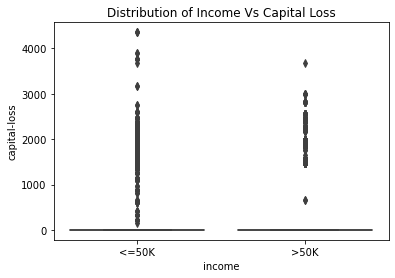

In [37]:
sns.boxplot(x="income",y="capital-loss",data=adult_df).set_title("Distribution of Income Vs Capital Loss")
plt.show()

* This boxplot is similar to the capital gain boxplot where most of the values are concentrated at 0.

### Relation between capital-gain and capital-loss

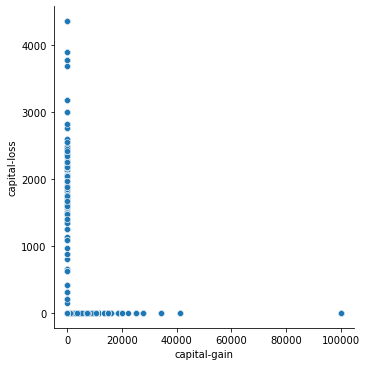

In [38]:
sns.relplot(x='capital-gain',y='capital-loss',data=adult_df)
plt.xlabel("capital-gain")
plt.ylabel('capital-loss')
plt.show()

* Both capital-gain and capital-loss can be zero(0).
* If capital-gain is zero then capital-loss being high or above zero. 
* If capital-loss is Zero then capital-gain being high or above zero.

### Plotting a boxplot for Income Vs Relationship

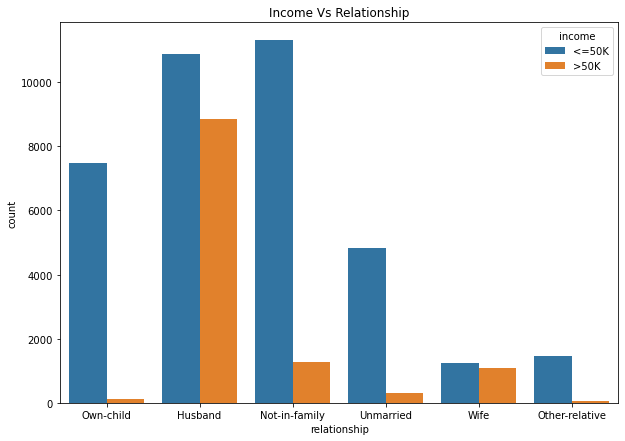

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(x='relationship',hue='income',data=adult_df)
plt.title("Income Vs Relationship")
plt.show()

Obervations:
* Husbands and Wives have more probability to earn money >50k than others.
* Remaining people have income < 50k comparitively more than the people have income >50k.

### Plotting a boxplot for Income Vs Education

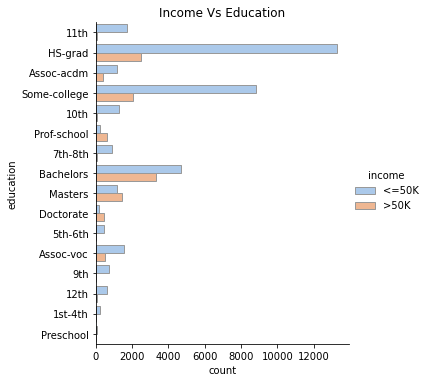

In [40]:
sns.catplot(y='education',hue='income',kind='count',palette="pastel", edgecolor=".6",data=adult_df)
plt.title("Income Vs Education")
plt.show()

* Majority of people who completed high graduation, have attended college has income <=50k.

### Plotting a distribution for Income Vs Occupation

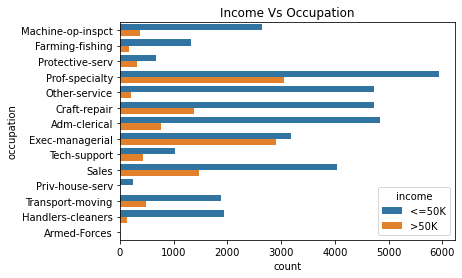

In [41]:
sns.countplot(y="occupation", hue="income",data=adult_df)
plt.title("Income Vs Occupation")
plt.show()

* The people with occupation profession-speciality and managerial has more income >50k compared to other occupations.

### Plotting a count plot for gender and income

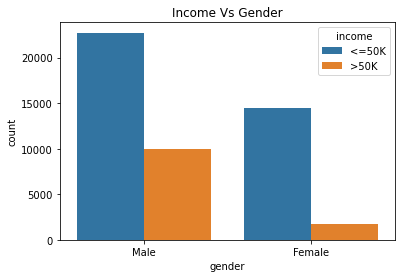

In [42]:
sns.countplot(x='gender', hue='income', data=adult_df)
plt.title("Income Vs Gender")
plt.show()

Observation:
* The ratio of males earning more than 50k is greater than the ratio of females earning more than 50k.

<h2 style="color:green" align="center">Multivariate Analysis</h2>

### Plotting a boxplot for Income Vs RaceVs Gender

<Figure size 1440x360 with 0 Axes>

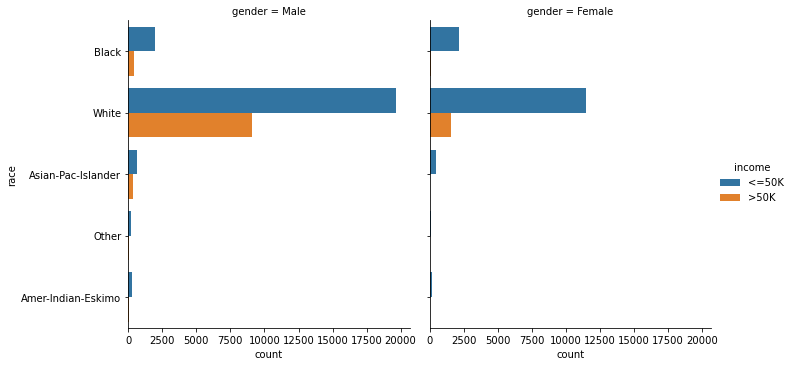

In [43]:
plt.figure(figsize=(20,5))
sns.catplot(y="race", hue='income', kind='count', col='gender', data=adult_df)
plt.show()

* We can observe that people with Gender as male and race as white has the most of the people with income > 50k.

### Cross tabulation between work-class and gender

In [44]:
pd.crosstab(adult_df['workclass'],adult_df['gender'],margins=True)

gender,Female,Male,All
workclass,,,
Federal-gov,452,980,1432
Local-gov,1258,1878,3136
Never-worked,3,7,10
Private,12869,23836,36705
Self-emp-inc,211,1484,1695
Self-emp-not-inc,629,3233,3862
State-gov,763,1218,1981
Without-pay,7,14,21
All,16192,32650,48842


### Box plot between work-class and age for different gender

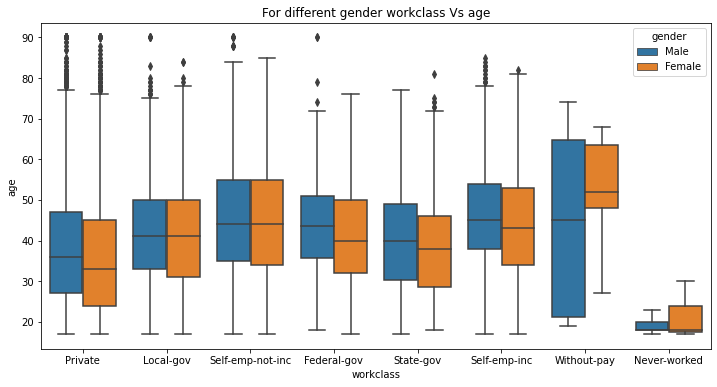

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(x="workclass",y="age", hue="gender", data=adult_df)
plt.title("For different gender workclass Vs age")
plt.show()

Observations:
* The cross tabulation values show that more number of men are self employed rather than women. 
* The box plot gives a few interesting observation:<br>
    Men who work without pay have a median age of around 40-50, whereas women who work without pay have a median age of around 50-55.

#### Cross tabulation between race and gender

In [46]:
pd.crosstab(adult_df['race'],adult_df['gender'], margins=True)

gender,Female,Male,All
race,,,
Amer-Indian-Eskimo,185,285,470
Asian-Pac-Islander,517,1002,1519
Black,2308,2377,4685
Other,155,251,406
White,13027,28735,41762
All,16192,32650,48842


### Plotting a Box plot between race and age for different gender

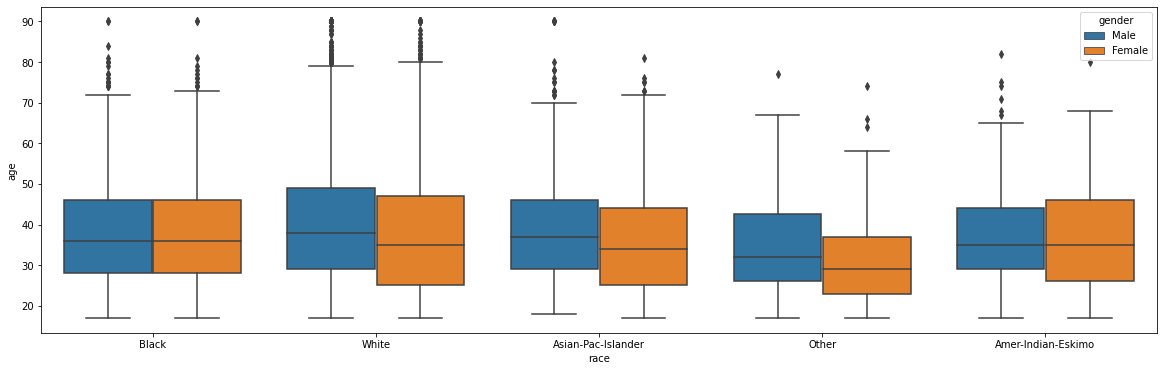

In [47]:
plt.figure(figsize=(20,6))
sns.boxplot(x="race",y="age", hue="gender", data=adult_df)
plt.show()

Observations:
* The above cross-tabulation gives a distribution of various races and gender. There is more difference between number of males and females in race 'white'.   
* The box plot gives a interesting observation:<br>
    People from "other" race have a younger median age than the rest of the races.

### HeatMap

<AxesSubplot:>

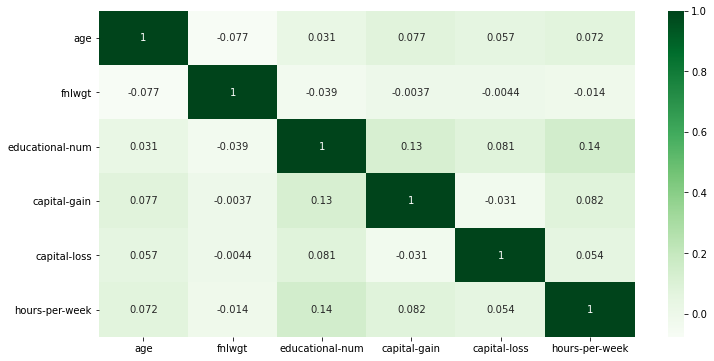

In [48]:
corr = adult_df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,cmap='Greens',annot=True)


Observations:
* The finalweight feature doesnot have much importance.
* There is some positive correlation between age, hours per week and education-num.
* There is a negative correlation between Capital gain and Capital loss.
* We can observe that there is no strong correlation among the numeric attributes.
* The strongest correlation is present between capital gain and hours-per-week with Coefficient .082.

### Pairplot

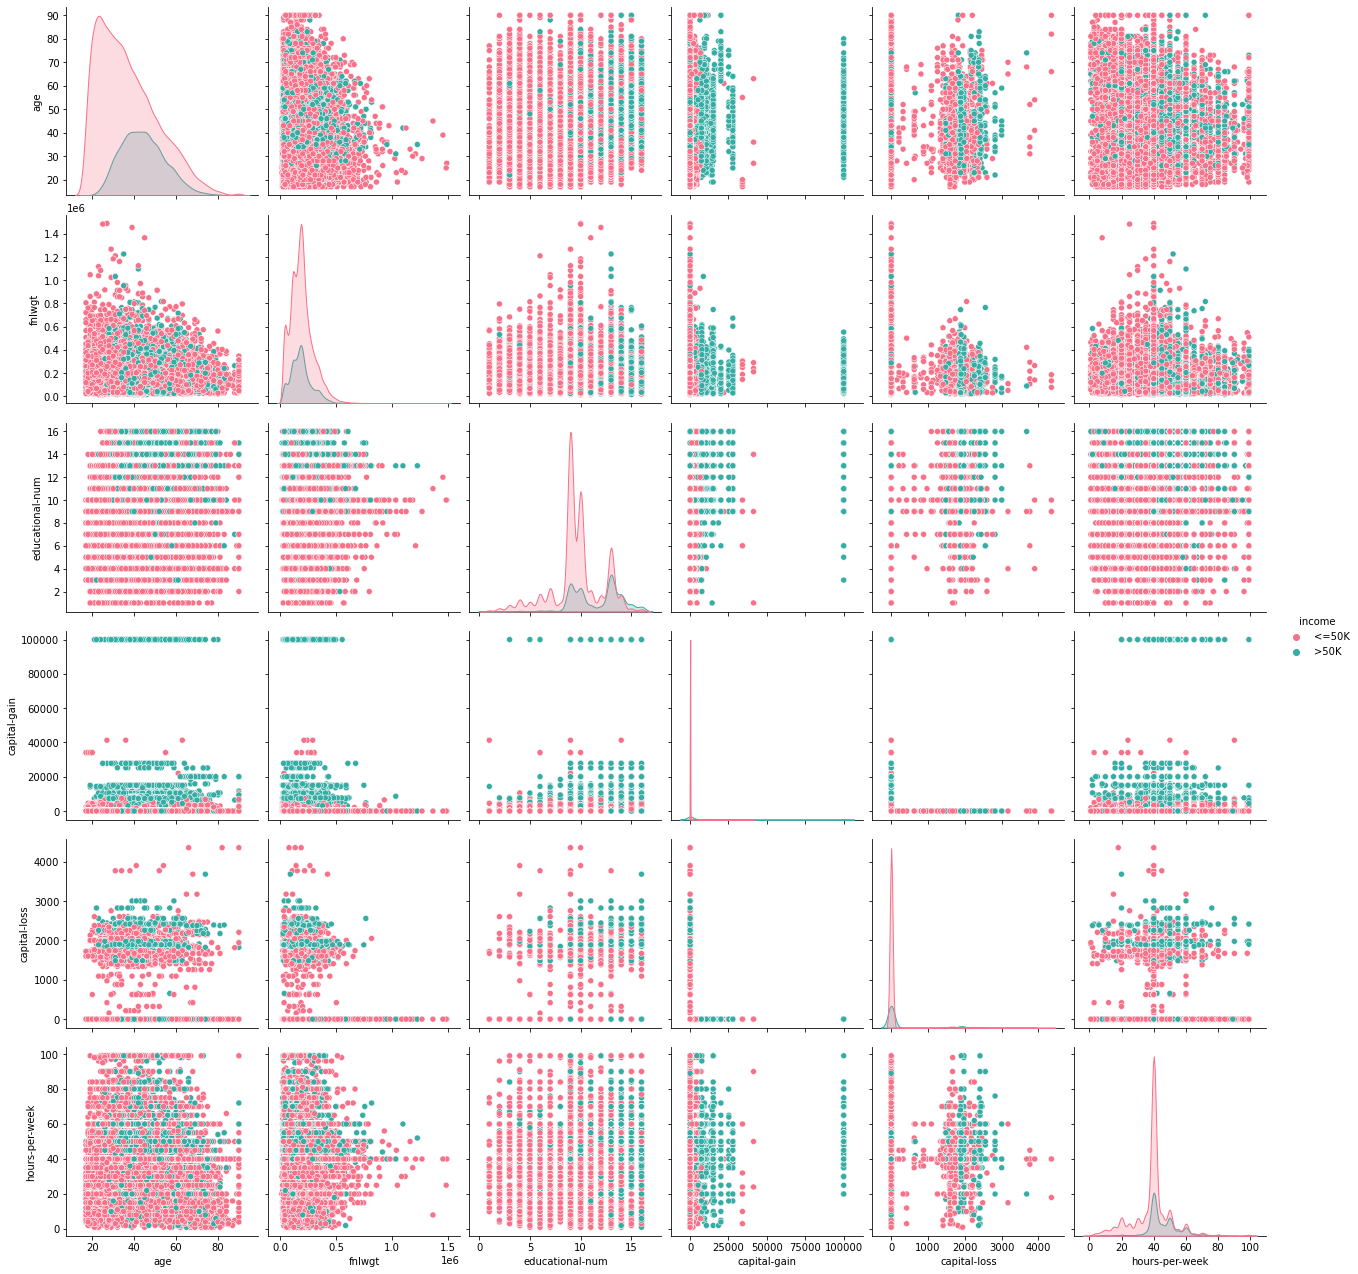

In [49]:
sns.pairplot(adult_df, height=3, diag_kind='kde', hue='income', palette = "husl")
plt.show()

* We can observe that distribution for age and finalweight is showing right skewed distribution.
* We can observe that distribution for capital-gain and capital-loss the distribution is highly right skewed.

### Check for outliers

In [50]:
adult_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Age

In [51]:
# Range of values observed
print('Range of values: ', adult_df['age'].max()-adult_df['age'].min())

Range of values:  73


In [52]:
# Central values
print("Minimum value: ", adult_df['age'].min())
print("Maximum value: ", adult_df['age'].max())
print("Mean value: ", adult_df['age'].mean())
print("Median value: ", adult_df['age'].median())
print("Standard deviation: ", adult_df['age'].std())
print("Null values: ", adult_df['age'].isnull().any())

Minimum value:  17
Maximum value:  90
Mean value:  38.64358543876172
Median value:  37.0
Standard deviation:  13.71050993444322
Null values:  False


In [53]:
# Quartiles
Q1 = adult_df['age'].quantile(q=0.25)
Q3 = adult_df['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ',stats.iqr(adult_df['age']))

1st Quartile (Q1) is:  28.0
3rd Quartile (Q3) is:  48.0
Interquartile range (IQR) is  20.0


In [54]:
# Outlier detection from Interquartile range (IQR) in original data
lower_outliers=Q1-1.5*(Q3-Q1)
upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', lower_outliers)
print('Upper outliers in age: ', upper_outliers)

Lower outliers in age:  -2.0
Upper outliers in age:  78.0


In [55]:
# identify outliers
outliers = [x for x in adult_df['age'] if x < lower_outliers or x > upper_outliers]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 216


### Finalweight

In [56]:
# Range of values observed
print('Range of values: ',adult_df['fnlwgt'].max()-adult_df['fnlwgt'].min())

Range of values:  1478115


In [57]:
# Central values
print('Minimum value: ', adult_df['fnlwgt'].min())
print('Maximum value: ', adult_df['fnlwgt'].max())
print('Mean value: ', adult_df['fnlwgt'].mean())
print('Median value: ', adult_df['fnlwgt'].median())
print('Standard deviation: ', adult_df['fnlwgt'].std())
print('Null values: ', adult_df['fnlwgt'].isnull().any())

Minimum value:  12285
Maximum value:  1490400
Mean value:  189664.13459727284
Median value:  178144.5
Standard deviation:  105604.02542315713
Null values:  False


In [58]:
# Quartiles
Q1 = adult_df['fnlwgt'].quantile(q=0.25)
Q3 = adult_df['fnlwgt'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(adult_df['fnlwgt']))

1st Quartile (Q1) is:  117550.5
3rd Quartile (Q3) is:  237642.0
Interquartile range (IQR) is  120091.5


In [59]:
# Outlier detection from Interquartile range (IQR) in original data
lower_outliers = Q1-1.5*(Q3-Q1)
upper_outliers = Q3+1.5*(Q3-Q1)
print('Lower outliers in finalweight: ', lower_outliers)
print('Upper outliers in finalweight: ', upper_outliers)

Lower outliers in finalweight:  -62586.75
Upper outliers in finalweight:  417779.25


In [60]:
# identify outliers
outliers = [x for x in adult_df['fnlwgt'] if x < lower_outliers or x > upper_outliers]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 1453


### Educational-num

In [61]:
# Range of values observed
print('Range of values: ',adult_df['educational-num'].max()-adult_df['educational-num'].min())

Range of values:  15


In [62]:
# Central values
print('Minimum value: ', adult_df['educational-num'].min())
print('Maximum value: ', adult_df['educational-num'].max())
print('Mean value: ', adult_df['educational-num'].mean())
print('Median value: ', adult_df['educational-num'].median())
print('Standard deviation: ', adult_df['educational-num'].std())
print('Null values: ', adult_df['educational-num'].isnull().any())

Minimum value:  1
Maximum value:  16
Mean value:  10.078088530363212
Median value:  10.0
Standard deviation:  2.5709727555918307
Null values:  False


In [63]:
# Quartiles
Q1 = adult_df['educational-num'].quantile(q=0.25)
Q3 = adult_df['educational-num'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(adult_df['educational-num']))

1st Quartile (Q1) is:  9.0
3rd Quartile (Q3) is:  12.0
Interquartile range (IQR) is  3.0


In [64]:
# Outlier detection from Interquartile range (IQR) in original data
lower_outliers = Q1-1.5*(Q3-Q1)
upper_outliers = Q3+1.5*(Q3-Q1)
print('Lower outliers in educational-num: ', lower_outliers)
print('Upper outliers in educational-num: ', upper_outliers)

Lower outliers in educational-num:  4.5
Upper outliers in educational-num:  16.5


In [65]:
# identify outliers
outliers = [x for x in adult_df['educational-num'] if x < lower_outliers or x > upper_outliers]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 1794


### Capital Gain

In [66]:
# Range of values observed
print('Range of values: ',adult_df['capital-gain'].max()-adult_df['capital-gain'].min())

Range of values:  99999


In [67]:
# Central values
print('Minimum value: ', adult_df['capital-gain'].min())
print('Maximum value: ', adult_df['capital-gain'].max())
print('Mean value: ', adult_df['capital-gain'].mean())
print('Median value: ', adult_df['capital-gain'].median())
print('Standard deviation: ', adult_df['capital-gain'].std())
print('Null values: ', adult_df['capital-gain'].isnull().any())

Minimum value:  0
Maximum value:  99999
Mean value:  1079.0676262233324
Median value:  0.0
Standard deviation:  7452.019057653448
Null values:  False


In [68]:
# Quartiles
Q1 = adult_df['capital-gain'].quantile(q=0.25)
Q3 = adult_df['capital-gain'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(adult_df['capital-gain']))

1st Quartile (Q1) is:  0.0
3rd Quartile (Q3) is:  0.0
Interquartile range (IQR) is  0.0


In [69]:
# Outlier detection from Interquartile range (IQR) in original data
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers: ', Lower_outliers)
print('Upper outliers: ', Upper_outliers)

Lower outliers:  0.0
Upper outliers:  0.0


In [70]:
# identify outliers
outliers = [x for x in adult_df['capital-gain'] if x < Lower_outliers or x > Upper_outliers]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 4035


### Capital loss

In [71]:
# Range of values observed
print('Range of values: ',adult_df['capital-loss'].max()-adult_df['capital-loss'].min())

Range of values:  4356


In [72]:
# Central values
print('Minimum value: ', adult_df['capital-loss'].min())
print('Maximum value: ', adult_df['capital-loss'].max())
print('Mean value: ', adult_df['capital-loss'].mean())
print('Median value: ', adult_df['capital-loss'].median())
print('Standard deviation: ', adult_df['capital-loss'].std())
print('Null values: ', adult_df['capital-loss'].isnull().any())

Minimum value:  0
Maximum value:  4356
Mean value:  87.50231358257237
Median value:  0.0
Standard deviation:  403.0045521244552
Null values:  False


In [73]:
# Quartiles
Q1 = adult_df['capital-loss'].quantile(q=0.25)
Q3 = adult_df['capital-loss'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(adult_df['capital-loss']))

1st Quartile (Q1) is:  0.0
3rd Quartile (Q3) is:  0.0
Interquartile range (IQR) is  0.0


In [74]:
# Outlier detection from Interquartile range (IQR) in original data
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers: ', Lower_outliers)
print('Upper outliers: ', Upper_outliers)

Lower outliers:  0.0
Upper outliers:  0.0


In [75]:
# identify outliers
outliers = [x for x in adult_df['capital-loss'] if x < Lower_outliers or x > Upper_outliers]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 2282


### Hours per week

In [76]:
# Range of values observed
print('Range of values: ',adult_df['hours-per-week'].max()-adult_df['hours-per-week'].min())

Range of values:  98


In [77]:
# Central values
print('Minimum value: ', adult_df['hours-per-week'].min())
print('Maximum value: ', adult_df['hours-per-week'].max())
print('Mean value: ', adult_df['hours-per-week'].mean())
print('Median value: ', adult_df['hours-per-week'].median())
print('Standard deviation: ', adult_df['hours-per-week'].std())
print('Null values: ', adult_df['hours-per-week'].isnull().any())

Minimum value:  1
Maximum value:  99
Mean value:  40.422382375824085
Median value:  40.0
Standard deviation:  12.39144402425593
Null values:  False


In [78]:
# Quartiles
Q1 = adult_df['hours-per-week'].quantile(q=0.25)
Q3 = adult_df['hours-per-week'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(adult_df['hours-per-week']))

1st Quartile (Q1) is:  40.0
3rd Quartile (Q3) is:  45.0
Interquartile range (IQR) is  5.0


In [79]:
# Outlier detection from Interquartile range (IQR) in original data
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers: ', Lower_outliers)
print('Upper outliers: ', Upper_outliers)

Lower outliers:  32.5
Upper outliers:  52.5


In [80]:
# identify outliers
outliers = [x for x in adult_df['hours-per-week'] if x < Lower_outliers or x > Upper_outliers]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 13496


### Treating outliers

<AxesSubplot:>

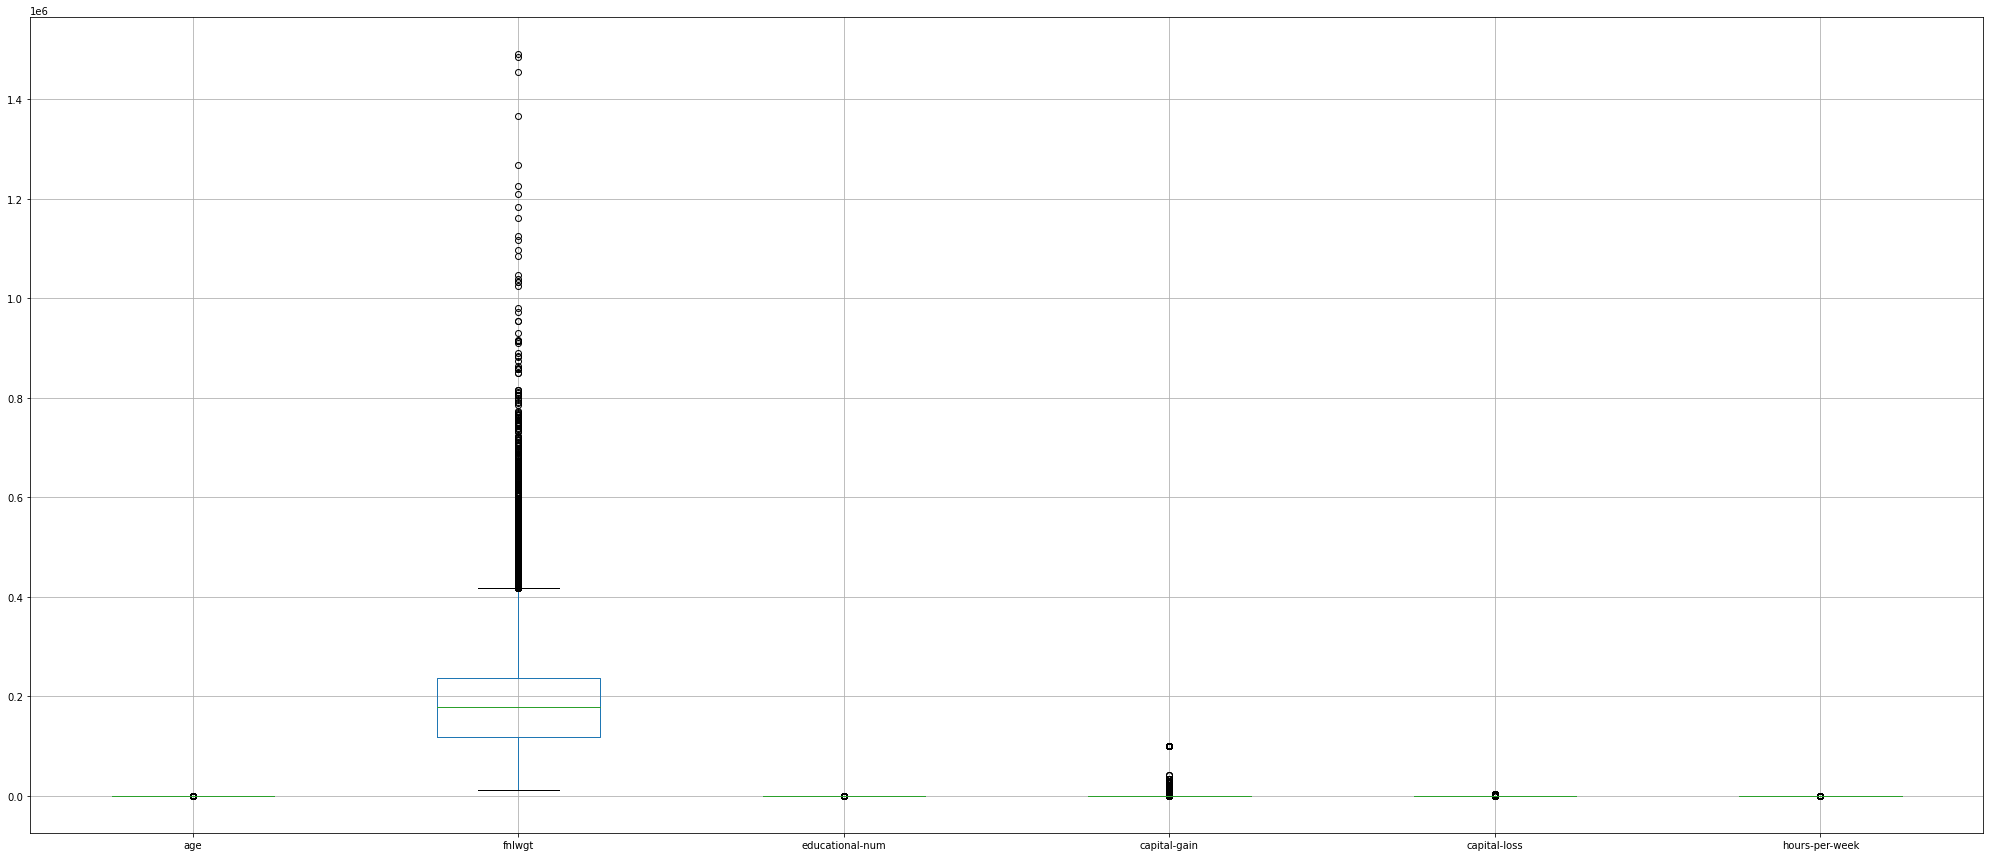

In [81]:
# check for outliers in dataset using boxplot
adult_df.boxplot(figsize=(35,15))

* It shows that age, finalweight, educational-num, capital gain, capital loss, hours per week has outliers.

In [82]:
num_cols = ["age", 'fnlwgt', 'educational-num','capital-gain', 'capital-loss', 'hours-per-week']

In [83]:
def outlier_remove(adult_df,col):
    q1 = adult_df[col].quantile(0.25)
    q3 = adult_df[col].quantile(0.75)
    iqr = q3 - q1
    l_bound = q1 - 1.5 * iqr
    u_bound = q3 + 1.5 * iqr
    print('Column Name',col)
    print('Lower Bound is :',l_bound)
    print('Upper Bound is :',u_bound)
    
# Replacing the outliers with each bounds
    adult_df[col]=adult_df[col].apply(lambda x:l_bound if x<l_bound else(u_bound if x>u_bound else x))
    outliers = [val for val in adult_df[col] if val < l_bound or val > u_bound]
    
    print('Length of Outliers :',len(outliers))
    
    print("percentage:",len(outliers)/len(adult_df[col])*100)
    
    return '**'

In [84]:
for col in num_cols:
    print(outlier_remove(adult_df,col))

Column Name age
Lower Bound is : -2.0
Upper Bound is : 78.0
Length of Outliers : 0
percentage: 0.0
**
Column Name fnlwgt
Lower Bound is : -62586.75
Upper Bound is : 417779.25
Length of Outliers : 0
percentage: 0.0
**
Column Name educational-num
Lower Bound is : 4.5
Upper Bound is : 16.5
Length of Outliers : 0
percentage: 0.0
**
Column Name capital-gain
Lower Bound is : 0.0
Upper Bound is : 0.0
Length of Outliers : 0
percentage: 0.0
**
Column Name capital-loss
Lower Bound is : 0.0
Upper Bound is : 0.0
Length of Outliers : 0
percentage: 0.0
**
Column Name hours-per-week
Lower Bound is : 32.5
Upper Bound is : 52.5
Length of Outliers : 0
percentage: 0.0
**


<AxesSubplot:>

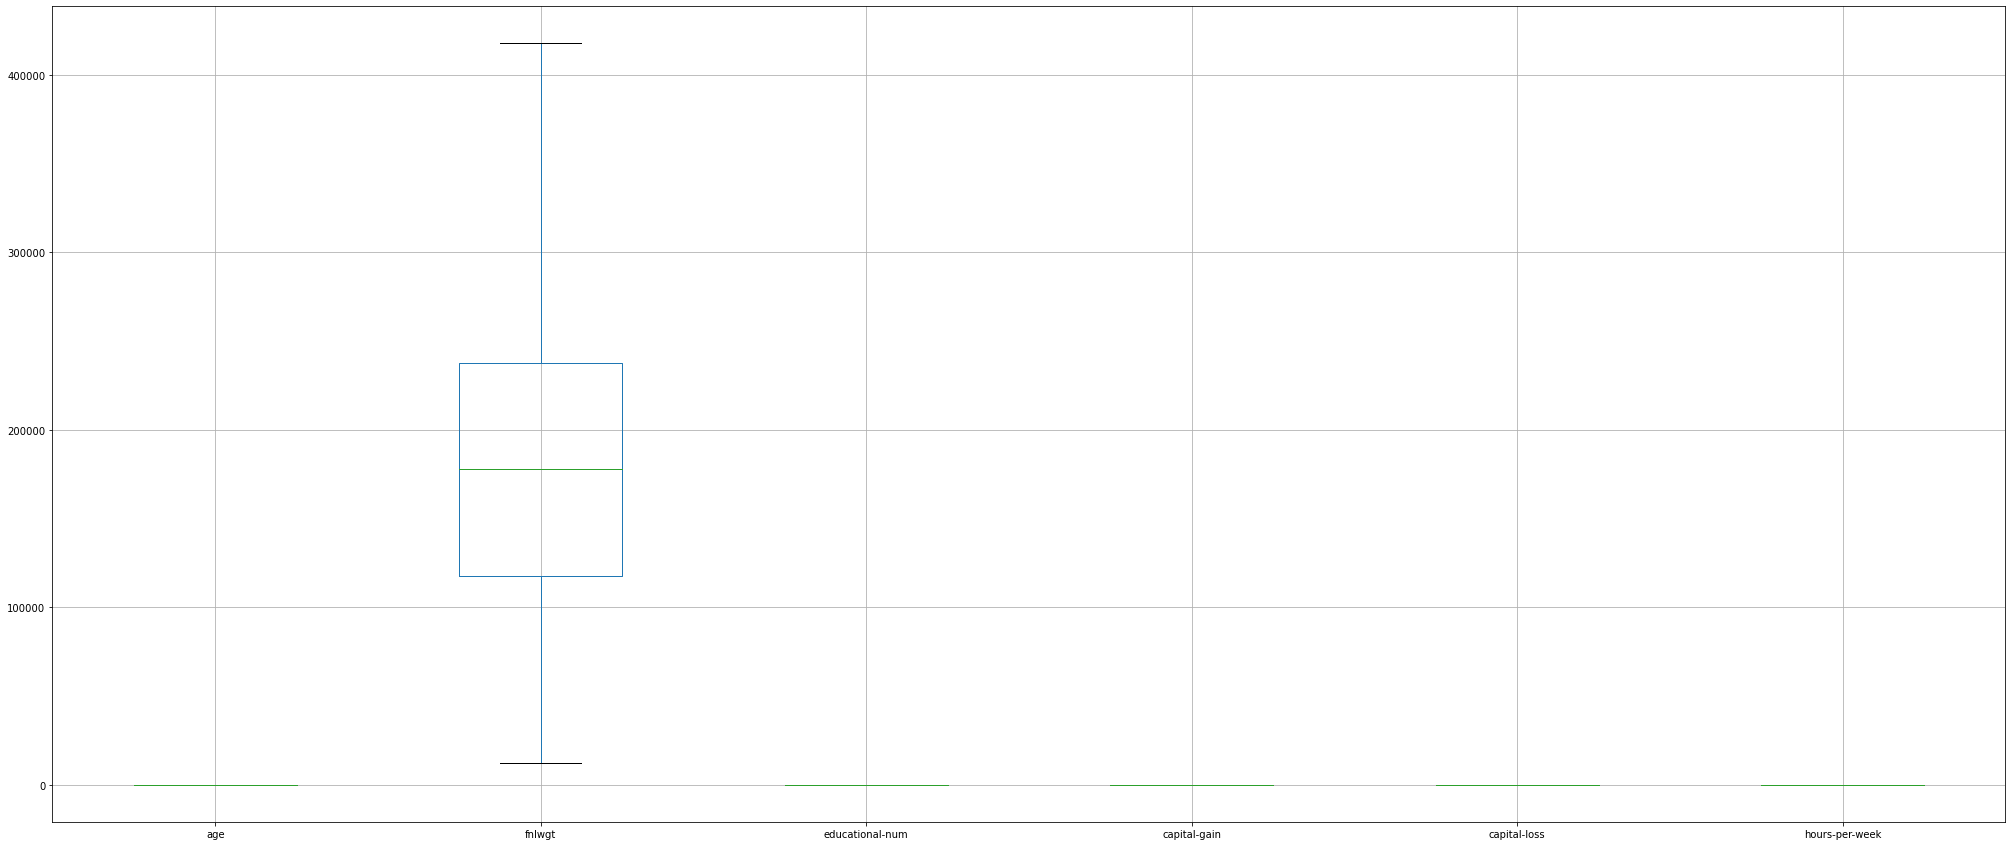

In [85]:
# again check for outliers in dataset using boxplot
adult_df.boxplot(figsize=(35,15))

In [86]:
# Combining capital-gain and capital-loss into 1 column
adult_df['netcapitalgain'] = adult_df.apply(lambda x: x['capital-gain'] + x['capital-loss'], axis=1)

In [87]:
#dropping unwanted data from the dataset 
adult_df.drop(['fnlwgt','education','capital-gain','capital-loss'],axis=1,inplace=True)

In [88]:
adult_df

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,netcapitalgain
0,25.0,Private,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,40.0,United-States,<=50K,0.0
1,38.0,Private,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,50.0,United-States,<=50K,0.0
2,28.0,Local-gov,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,40.0,United-States,>50K,0.0
3,44.0,Private,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40.0,United-States,>50K,0.0
4,18.0,Private,10.0,Never-married,Prof-specialty,Own-child,White,Female,32.5,United-States,<=50K,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,38.0,United-States,<=50K,0.0
48838,40.0,Private,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40.0,United-States,>50K,0.0
48839,58.0,Private,9.0,Widowed,Adm-clerical,Unmarried,White,Female,40.0,United-States,<=50K,0.0
48840,22.0,Private,9.0,Never-married,Adm-clerical,Own-child,White,Male,32.5,United-States,<=50K,0.0


### LabelEncoding

In [89]:
le = LabelEncoder()
adult_df['gender'] = le.fit_transform(adult_df['gender'])
adult_df['income'] = le.fit_transform(adult_df['income'])

In [90]:
adult_df['gender'].value_counts()

1    32650
0    16192
Name: gender, dtype: int64

In [91]:
adult_df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [92]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  float64
 1   workclass        48842 non-null  object 
 2   educational-num  48842 non-null  float64
 3   marital-status   48842 non-null  object 
 4   occupation       48842 non-null  object 
 5   relationship     48842 non-null  object 
 6   race             48842 non-null  object 
 7   gender           48842 non-null  int32  
 8   hours-per-week   48842 non-null  float64
 9   native-country   48842 non-null  object 
 10  income           48842 non-null  int32  
 11  netcapitalgain   48842 non-null  float64
dtypes: float64(4), int32(2), object(6)
memory usage: 4.1+ MB


### Converting all categorical columns into numerical columns using get dummies method

In [93]:
cat_cols = ['workclass','marital-status','occupation','relationship','race','native-country']

In [94]:
adult_df = pd.get_dummies(data=adult_df,drop_first=True,columns=cat_cols)
adult_df

,age,educational-num,gender,hours-per-week,income,netcapitalgain,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,7.0,1,40.0,0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38.0,9.0,1,50.0,0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28.0,12.0,1,40.0,1,0.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44.0,10.0,1,40.0,1,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,18.0,10.0,0,32.5,0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,12.0,0,38.0,0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,40.0,9.0,1,40.0,1,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,58.0,9.0,0,40.0,0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,22.0,9.0,1,32.5,0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Target Variable

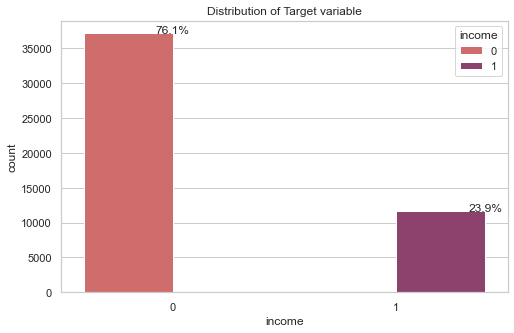

In [95]:
ax=sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(adult_df))
ax = sns.countplot(x="income", hue="income", data=adult_df,palette="flare")
plt.title("Distribution of Target variable")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

* We can observe that data is highly imbalanced.

### Splitting the data into independent and dependent attributes

In [96]:
#independent and dependent variable
X = adult_df.drop(['income'],axis=1) # contains all the independent variables
y = adult_df['income']  # dependent variable

In [97]:
print(X.shape)
print(y.shape)

(48842, 80)
(48842,)


### Handling Imbalanced data

In [98]:
# Apply SMOTE
sm = SMOTE()
X_new,y_new=sm.fit_resample(X,y)
print(X_new.shape,y_new.shape)

(74310, 80) (74310,)


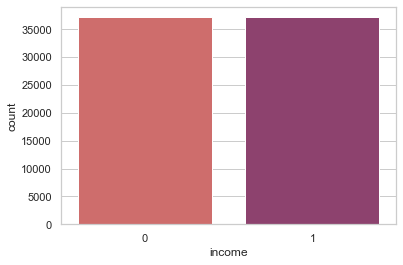

In [99]:
sns.countplot(y_new,palette='flare')
plt.show()

* Now,we can observe that the data is balanced.

## Train Test Split

#### Scaling the features

In [100]:
sc = StandardScaler()
X_scaler = sc.fit_transform(X_new)

#### Splitting the data into training and test sets

In [101]:
# Split X and y into training and test set in 80:20 ratio
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y_new,test_size=0.2,random_state=2)

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(59448, 80)
(14862, 80)
(59448,)
(14862,)


### Logistic Regression

In [103]:
lr_model = LogisticRegression()
# Fitting model on Training data 
lr_model.fit(X_train,y_train)

LogisticRegression()

In [104]:
# Making predictions on Test data
y_pred = lr_model.predict(X_test)
# Making probabilities on Test data
y_pred_prob = lr_model.predict_proba(X_test)[:,1]

In [105]:
lr_acc = accuracy_score(y_test,y_pred)
lr_recall = recall_score(y_test,y_pred)
lr_precision = precision_score(y_test,y_pred)
lr_f1score = f1_score(y_test,y_pred)
lr_AUC = roc_auc_score(y_pred,y_test)

print("The Logistic Regression model accuracy is {}".format(lr_acc))
print("The Logistic Regression model ROC_AUC score is {}".format(lr_AUC))

The Logistic Regression model accuracy is 0.8511640425245592
The Logistic Regression model ROC_AUC score is 0.8519270174824721


#### Confusion Matrix:

In [106]:
print("The Logistic Regression model confusion_matrix is:""\n",confusion_matrix(y_test,y_pred))

The Logistic Regression model confusion_matrix is:
 [[6152 1279]
 [ 933 6498]]


#### 2. Classification Report

In [107]:
print (classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7431
           1       0.84      0.87      0.85      7431

    accuracy                           0.85     14862
   macro avg       0.85      0.85      0.85     14862
weighted avg       0.85      0.85      0.85     14862



#### 3. ROC_AUC Curve

In [108]:
[fpr,tpr,thr]  = roc_curve(y_test,y_pred_prob)

In [109]:
auc(fpr,tpr)

0.9301903715229771

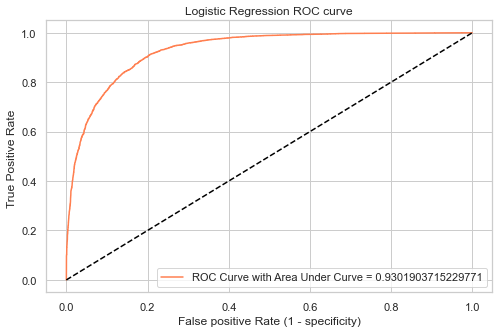

In [110]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.plot((0,1), ls='dashed',color='black')
plt.title('Logistic Regression ROC curve')
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

### Support Vector Classifier

In [111]:
svm_model = svm.SVC(probability=True)
# Fitting model on Training data 
svm_model.fit(X_train,y_train)

SVC(probability=True)

In [112]:
# Making predictions on Test data
y_pred = svm_model.predict(X_test)
# Making probabilties on Test data
y_pred_prob = svm_model.predict_proba(X_test)[:,1]

In [113]:
svm_acc = accuracy_score(y_test,y_pred)
svm_recall = recall_score(y_test,y_pred)
svm_precision = precision_score(y_test,y_pred)
svm_f1score = f1_score(y_test,y_pred)
svm_AUC = roc_auc_score(y_pred,y_test)

print("The Support Vector Classifier model accuracy is {}".format(svm_acc))
print("The Support Vector Classifier model ROC_AUC score {}".format(svm_AUC))

The Support Vector Classifier model accuracy is 0.8539227560220697
The Support Vector Classifier model ROC_AUC score 0.8554494120611846


#### Confusion Matrix:

In [114]:
confusion_matrix(y_test,y_pred)

array([[6102, 1329],
       [ 842, 6589]], dtype=int64)

#### 2. Classification Report

In [115]:
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      7431
           1       0.83      0.89      0.86      7431

    accuracy                           0.85     14862
   macro avg       0.86      0.85      0.85     14862
weighted avg       0.86      0.85      0.85     14862



#### 3. ROC_AUC Curve

In [116]:
[fpr,tpr,thr]  = roc_curve(y_test,y_pred_prob)

In [117]:
auc(fpr,tpr)

0.9335774923038873

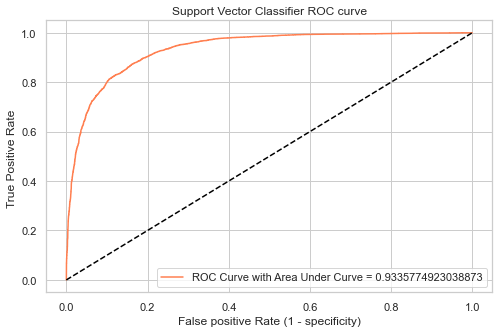

In [118]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.plot((0,1), ls='dashed',color='black')
plt.title('Support Vector Classifier ROC curve')
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

### KNN Classifier

In [119]:
knn_model = KNeighborsClassifier()
# Fitting model on Training data 
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [120]:
# Making predictions on Test data
y_pred = knn_model.predict(X_test)
# Making probabilities on Test data
y_pred_prob = knn_model.predict_proba(X_test)[:,1]

In [121]:
knn_acc = accuracy_score(y_test,y_pred)
knn_recall = recall_score(y_test,y_pred)
knn_precision = precision_score(y_test,y_pred)
knn_f1score = f1_score(y_test,y_pred)
knn_AUC = roc_auc_score(y_pred,y_test)

print("The KNeighborsClassifier model accuracy is {}".format(knn_acc))
print("The KNeighborsClassifier model ROC_AUC score is {}".format(knn_AUC))

The KNeighborsClassifier model accuracy is 0.861324182478805
The KNeighborsClassifier model ROC_AUC score is 0.8618342451623011


#### Confusion Matrix:

In [122]:
confusion_matrix(y_test,y_pred)

array([[6261, 1170],
       [ 891, 6540]], dtype=int64)

#### 2. Classification Report

In [123]:
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7431
           1       0.85      0.88      0.86      7431

    accuracy                           0.86     14862
   macro avg       0.86      0.86      0.86     14862
weighted avg       0.86      0.86      0.86     14862



#### 3. ROC_AUC Curve

In [124]:
[fpr,tpr,thr] = roc_curve(y_test,y_pred_prob)

In [125]:
auc(fpr,tpr)

0.9222944662871684

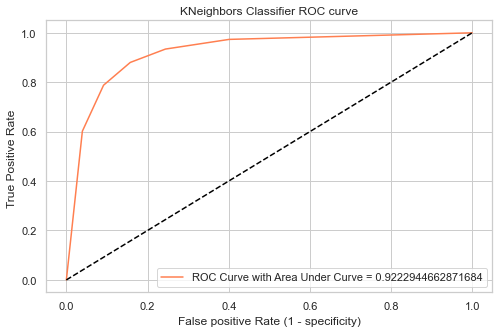

In [126]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.plot((0,1), ls='dashed',color='black')
plt.title('KNeighbors Classifier ROC curve')
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

### Decision Tree Classifier

In [127]:
dt_model = DecisionTreeClassifier()
# Fitting model on Training data
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [128]:
# Making predictions on Test data
y_pred = dt_model.predict(X_test)
# Making probabilities on Test data
y_pred_prob = dt_model.predict_proba(X_test)[:,1]

In [129]:
dt_acc = accuracy_score(y_test,y_pred)
dt_recall = recall_score(y_test,y_pred)
dt_precision = precision_score(y_test,y_pred)
dt_f1score = f1_score(y_test,y_pred)
dt_AUC = roc_auc_score(y_pred,y_test)

print("The DecisionTreeClassifier model accuracy is {}".format(dt_acc))
print("The DecisionTreeClassifier model ROC_AUC score is {}".format(dt_AUC))

The DecisionTreeClassifier model accuracy is 0.8438971874579464
The DecisionTreeClassifier model ROC_AUC score is 0.8439454222438569


#### Confusion Matrix:

In [130]:
confusion_matrix(y_test,y_pred)

array([[6227, 1204],
       [1116, 6315]], dtype=int64)

#### 2. Classification Report

In [131]:
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      7431
           1       0.84      0.85      0.84      7431

    accuracy                           0.84     14862
   macro avg       0.84      0.84      0.84     14862
weighted avg       0.84      0.84      0.84     14862



#### 3. ROC_AUC Curve

In [132]:
[fpr,tpr,thr] = roc_curve(y_test,y_pred)

In [133]:
auc(fpr,tpr)

0.8438971874579465

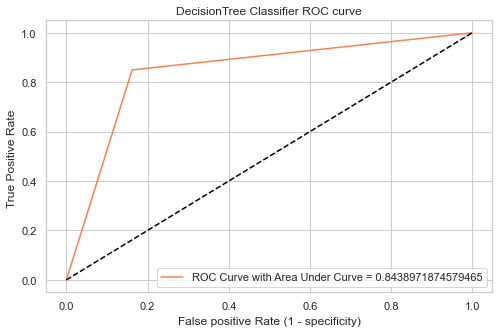

In [134]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.plot((0,1), ls='dashed',color='black')
plt.title('DecisionTree Classifier ROC curve')
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

### Random Forest Classifier

In [135]:
rf_model = RandomForestClassifier()
# Fitting model on Training data
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [136]:
# Making predictions on Test data
y_pred = rf_model.predict(X_test)
# Making probabilities on Test data
y_pred_prob = rf_model.predict_proba(X_test)[:,1]

In [137]:
rf_acc = accuracy_score(y_test,y_pred)
rf_recall = recall_score(y_test,y_pred)
rf_precision = precision_score(y_test,y_pred)
rf_f1score = f1_score(y_test,y_pred)
rf_AUC = roc_auc_score(y_pred,y_test)

print("The RandomForestClassifier model accuracy is {}".format(rf_acc))
print("The RandomForestClassifier model ROC_AUC score is {}".format(rf_AUC))

The RandomForestClassifier model accuracy is 0.8740411788453775
The RandomForestClassifier model ROC_AUC score is 0.8741521918124683


#### Confusion Matrix:

In [138]:
confusion_matrix(y_test,y_pred)

array([[6431, 1000],
       [ 872, 6559]], dtype=int64)

#### 2. Classification Report

In [139]:
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7431
           1       0.87      0.88      0.88      7431

    accuracy                           0.87     14862
   macro avg       0.87      0.87      0.87     14862
weighted avg       0.87      0.87      0.87     14862



#### 3. ROC_AUC Curve

In [140]:
[fpr,tpr,thr] = roc_curve(y_test,y_pred)

In [141]:
auc(fpr,tpr)

0.8740411788453774

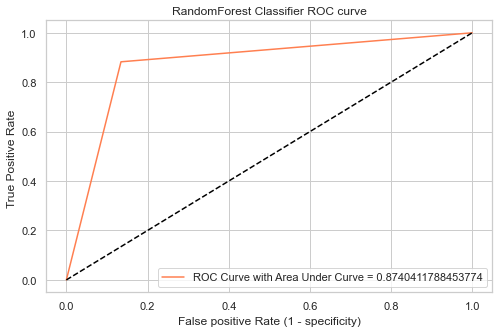

In [142]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.plot((0,1), ls='dashed',color='black')
plt.title('RandomForest Classifier ROC curve')
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

### Gradient Boosting Classifier

In [143]:
gb_model = GradientBoostingClassifier()
# Fitting model on Training data
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [144]:
# Making predictions on Test data
y_pred = gb_model.predict(X_test)
# Making probabilities on Test data
y_pred_prob = gb_model.predict_proba(X_test)[:,1]

In [145]:
gb_acc = accuracy_score(y_test,y_pred)
gb_recall = recall_score(y_test,y_pred)
gb_precision = precision_score(y_test,y_pred)
gb_f1score = f1_score(y_test,y_pred)
gb_AUC = roc_auc_score(y_pred,y_test)

print("The GradientBoostingClassifier model accuracy is {}".format(gb_acc))
print("The GradientBoostingClassifier model ROC_AUC score is {}".format(gb_AUC))

The GradientBoostingClassifier model accuracy is 0.846723186650518
The GradientBoostingClassifier model ROC_AUC score is 0.848351170816287


#### Confusion Matrix:

In [146]:
confusion_matrix(y_test,y_pred)

array([[6038, 1393],
       [ 885, 6546]], dtype=int64)

#### 2. Classification Report

In [147]:
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      7431
           1       0.82      0.88      0.85      7431

    accuracy                           0.85     14862
   macro avg       0.85      0.85      0.85     14862
weighted avg       0.85      0.85      0.85     14862



#### 3. ROC_AUC Curve

In [148]:
[fpr,tpr,thr] = roc_curve(y_test,y_pred)

In [149]:
auc(fpr,tpr)

0.8467231866505182

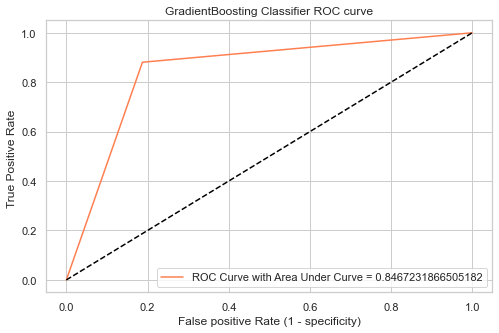

In [150]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.plot((0,1), ls='dashed',color='black')
plt.title('GradientBoosting Classifier ROC curve')
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

### AdaBoostClassifier

In [151]:
ab_model = AdaBoostClassifier()
# Fitting model on Training data
ab_model.fit(X_train,y_train)

AdaBoostClassifier()

In [152]:
# Making predictions on Test data
y_pred = ab_model.predict(X_test)
# Making probabilities on Test data
y_pred_prob = ab_model.predict_proba(X_test)[:,1]

In [153]:
ab_acc = accuracy_score(y_test,y_pred)
ab_recall = recall_score(y_test,y_pred)
ab_precision = precision_score(y_test,y_pred)
ab_f1score = f1_score(y_test,y_pred)
ab_AUC = roc_auc_score(y_pred,y_test)

print("The AdaBoostClassifier model accuracy is {}".format(ab_acc))
print("The AdaBoostClassifier model ROC_AUC score is {}".format(ab_AUC))

The AdaBoostClassifier model accuracy is 0.8465213295653344
The AdaBoostClassifier model ROC_AUC score is 0.848451063948193


#### Confusion Matrix:

In [154]:
confusion_matrix(y_test,y_pred)

array([[6014, 1417],
       [ 864, 6567]], dtype=int64)

#### 2. Classification Report

In [155]:
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      7431
           1       0.82      0.88      0.85      7431

    accuracy                           0.85     14862
   macro avg       0.85      0.85      0.85     14862
weighted avg       0.85      0.85      0.85     14862



#### 3. ROC_AUC Curve

In [156]:
[fpr,tpr,thr] = roc_curve(y_test,y_pred)

In [157]:
auc(fpr,tpr)

0.8465213295653343

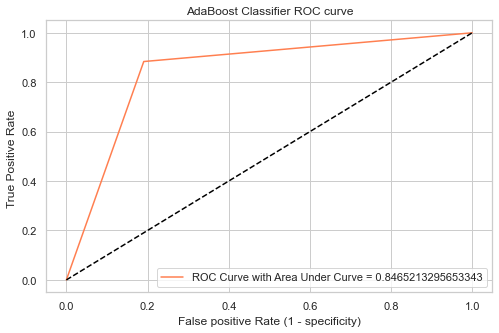

In [158]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.plot((0,1), ls='dashed',color='black')
plt.title('AdaBoost Classifier ROC curve')
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

### XGBoostClassifier

In [159]:
xgb_model = XGBClassifier()
# Fitting model on Training data
xgb_model.fit(X_train,y_train)

[10:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
# Making predictions on Test data
y_pred = xgb_model.predict(X_test)
# Making probabilities on Test data
y_pred_prob = xgb_model.predict_proba(X_test)[:,1]

In [161]:
xgb_acc = accuracy_score(y_test,y_pred)
xgb_recall = recall_score(y_test,y_pred)
xgb_precision = precision_score(y_test,y_pred)
xgb_f1score = f1_score(y_test,y_pred)
xgb_AUC = roc_auc_score(y_pred,y_test)

print("The XGBClassifier model accuracy is {}".format(xgb_acc))
print("The XGBClassifier model ROC_AUC score is {}".format(xgb_AUC))

The XGBClassifier model accuracy is 0.8754541784416633
The XGBClassifier model ROC_AUC score is 0.8761826283940553


#### Confusion Matrix:

In [162]:
confusion_matrix(y_test,y_pred)

array([[6342, 1089],
       [ 762, 6669]], dtype=int64)

#### 2. Classification Report

In [163]:
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7431
           1       0.86      0.90      0.88      7431

    accuracy                           0.88     14862
   macro avg       0.88      0.88      0.88     14862
weighted avg       0.88      0.88      0.88     14862



#### 3. ROC_AUC Curve

In [164]:
[fpr,tpr,thr] = roc_curve(y_test,y_pred)

In [165]:
auc(fpr,tpr)

0.8754541784416633

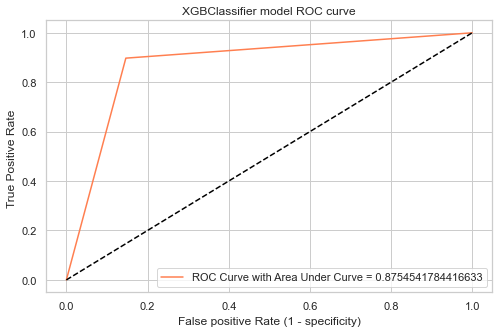

In [166]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.plot((0,1), ls='dashed',color='black')
plt.title('XGBClassifier model ROC curve')
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

### Comparing the models

In [167]:
ind=['Logistic regression','Support Vector Classifier','KNeighborsClassifier','Decision Tree ','Randomforest','Gradient Boosting Classifier','AdaBoost Classifier','XGBoostClassifier']
data={"Accuracy":[lr_acc,svm_acc,knn_acc,dt_acc,rf_acc,gb_acc,ab_acc,xgb_acc],
      "Recall":[lr_recall,svm_recall,knn_recall,dt_recall,rf_recall,gb_recall,ab_recall,xgb_recall],
      "Precision":[lr_precision,svm_precision,knn_precision,dt_precision,rf_precision,gb_precision,ab_precision,xgb_precision],
      'F1_score':[lr_f1score,svm_f1score,knn_f1score,dt_f1score,rf_f1score,gb_f1score,ab_f1score,xgb_f1score],
      "ROC_AUC":[lr_AUC,svm_AUC,knn_AUC,dt_AUC,rf_AUC,gb_AUC,ab_AUC,xgb_AUC]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,F1_score,ROC_AUC
Logistic regression,0.851164,0.874445,0.835541,0.854550,0.851927
Support Vector Classifier,0.853923,0.886691,0.832155,0.858558,0.855449
KNeighborsClassifier,0.861324,0.880097,0.848249,0.863880,0.861834
Decision Tree,0.843897,0.849818,0.839872,0.844816,0.843945
Randomforest,0.874041,0.882654,0.867707,0.875117,0.874152
Gradient Boosting Classifier,0.846723,0.880904,0.824537,0.851789,0.848351
AdaBoost Classifier,0.846521,0.883730,0.822520,0.852027,0.848451
XGBoostClassifier,0.875454,0.897457,0.859629,0.878135,0.876183


* Based on <b> Accuracy </b> <br>
       Randomforest and XGBoost Classifier performed better compared to other models.
* Based on <b> Recall </b> <br>
       XGBoostClassifier performed better compared to other models.
* Based on <b> Precision </b> <br>
       Randomforest performed better compared to other models.
* Based on <b> F1 scores </b> <br>
       Randomforest and XGBoost Classifier performed better compared to other models. 

The accuracy score of XGBoost Classifier is 87% highest among other algorithms,so we use the XGBoost Classifier model.